In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data='train_LZdllcl.csv'
prom_df=pd.read_csv(data)
prom_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
prom_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
del prom_df['employee_id']

## Data Preprocessing

In [ ]:
prom_df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
prom_df.dropna(axis=0,how='any',inplace=True)

In [ ]:
prom_df.shape

(48660, 13)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Department Data')

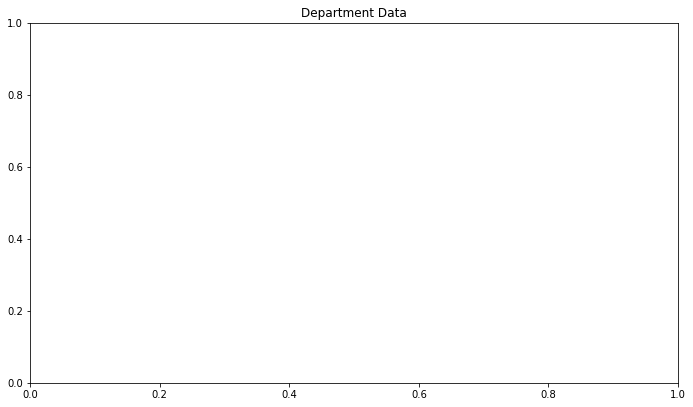

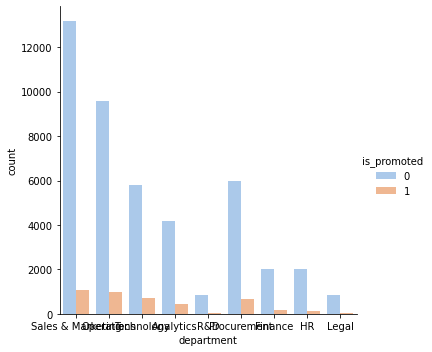

In [ ]:
fig=plt.figure(figsize=(9,5))
axis=fig.add_axes([0,1,1,1])
sns.catplot(x="department",kind="count",hue="is_promoted",data=prom_df,palette="pastel",ax=axis)
axis.set_title('Department Data')

In [ ]:
# The highest chance of getting promoted is in Sales $ Marketing and Operations column

In [ ]:
prom_df['region'].value_counts()

region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: region, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
prom_df['region']=le.fit_transform(prom_df['region'])

In [ ]:
prom_df['region'].value_counts()

11    10811
14     5435
31     4397
6      2512
4      2463
18     1966
24     1692
28     1626
19     1418
7      1319
2      1189
20     1143
15     1104
21      896
10      838
12      780
25      773
5       770
8       742
17      721
29      690
1       614
23      602
30      579
32      578
0       553
16      462
3       425
13      370
22      331
33      324
26      260
27      253
9        24
Name: region, dtype: int64

In [ ]:
prom_df['region'].dtype

dtype('int64')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Region')

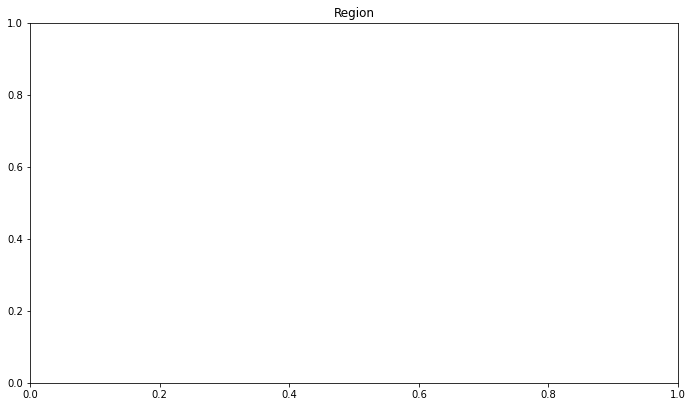

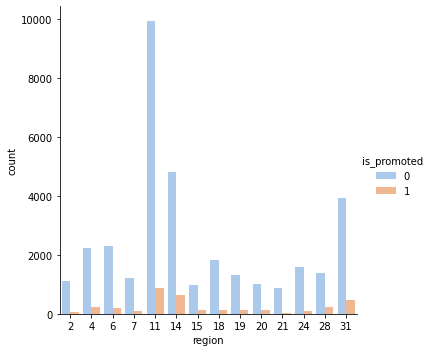

In [ ]:
lis=[11,14,31,6,4,18,24,28,19,7,20,2,15,21]
sample=prom_df.loc[prom_df['region'].isin(lis)]
sample.head()
fig=plt.figure(figsize=(9,5))
axis=fig.add_axes([0,1,1,1])
sns.catplot(x="region",kind="count",hue="is_promoted",data=sample,palette="pastel",ax=axis)
axis.set_title('Region')

In [ ]:
#Region column is not giving any clear impact on chances of promotion due to it's varying distribution
del prom_df['region']

In [ ]:
prom_df['education'].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'education')

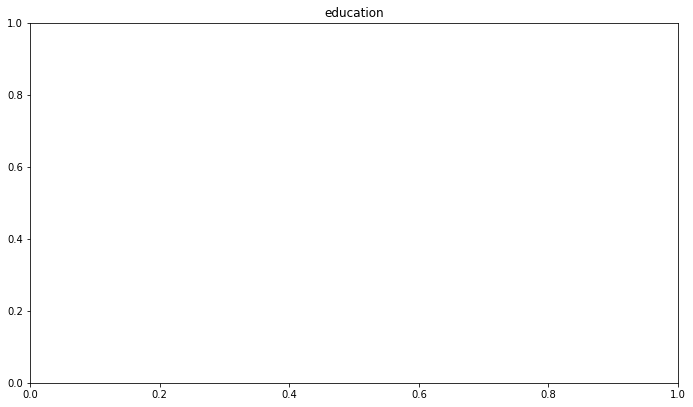

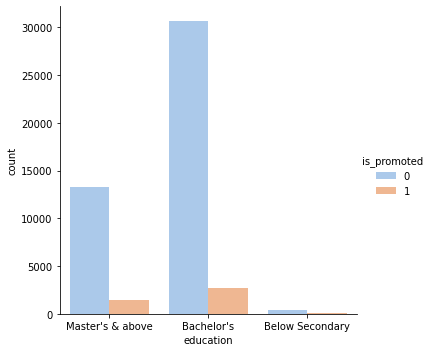

In [ ]:
fig=plt.figure(figsize=(9,5))
axis=fig.add_axes([0,1,1,1])
sns.catplot(x="education",kind="count",hue="is_promoted",data=prom_df,palette="pastel",ax=axis)
axis.set_title('education')

In [ ]:
#Below Secondary data is not available to a good extent
#But clearly the proportion of Master and above is slightly more than Bachelor's education

In [ ]:
sample=pd.get_dummies(prom_df['education'])
prom_df=pd.concat([sample,prom_df],axis=1)
del prom_df['education']

In [ ]:
prom_df.gender.value_counts()

m    33852
f    14808
Name: gender, dtype: int64

In [ ]:
female_prop=len(prom_df[(prom_df['gender']=='f') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['gender']=='f')])
male_prop=len(prom_df[(prom_df['gender']=='m') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['gender']=='m')])

([<matplotlib.patches.Wedge at 0x7f25266edef0>,
 [Text(-0.07123219762999024, 1.0976912015775668, 'female'),
  Text(0.07123219762999035, -1.0976912015775668, 'male')])

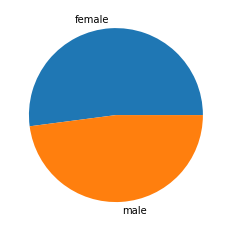

In [ ]:

lis1=['female','male']
lis2=[female_prop/(female_prop+male_prop),male_prop/(female_prop+male_prop)]
plt.pie(lis2,labels=lis1,radius=1)

In [ ]:
#Clearly female candidates have slightly more chances to get promoted than males

In [ ]:
sample=pd.get_dummies(prom_df['gender'])
prom_df=pd.concat([sample,prom_df],axis=1)
del prom_df['gender']

In [ ]:
prom_df.recruitment_channel.value_counts()

other       27017
sourcing    20623
referred     1020
Name: recruitment_channel, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2526744240>,
 [Text(0.42886629623798134, 1.0129529603842007, 'other'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'sourcing'),
  Text(0.46785434827306405, -1.1050395055390494, 'referred')])

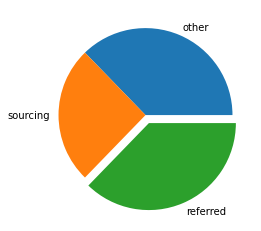

In [ ]:
other=len(prom_df[(prom_df['recruitment_channel']=='other') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='other')])
sourcing=len(prom_df[(prom_df['recruitment_channel']=='sourcing') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='sourcing')])
referred=other=len(prom_df[(prom_df['recruitment_channel']=='referred') & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['recruitment_channel']=='referred')])
list1=['other','sourcing','referred']
s=other+sourcing+referred
list2=[other/s,sourcing/s,referred/s]
plt.pie(list2,labels=list1,radius=1,explode=[0,0,.1])

In [ ]:
#sufficient data for referred is not available. That's why it can be said for sure that referred has highest proportion
# Comparing other and sourcing, chances of promotion for those admitted through other means are more

In [ ]:
sample=pd.get_dummies(prom_df['recruitment_channel'])
prom_df=pd.concat([sample,prom_df],axis=1)
del prom_df['recruitment_channel']

In [ ]:
prom_df['no_of_trainings'].value_counts()

1     39400
2      7107
3      1579
4       402
5       116
6        34
7        10
10        5
8         4
9         3
Name: no_of_trainings, dtype: int64

In [ ]:
#Since no. of observations for 6 and above training is exceedingly less. We'll analyze using data upto 5 trainings
dic={}
for i in range(1,6):
    dic['train'+str(i)]=len(prom_df[(prom_df['no_of_trainings']==i) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['no_of_trainings']==i)])

In [ ]:
names=np.array(list(dic.keys()))
values=np.array(list(dic.values()))

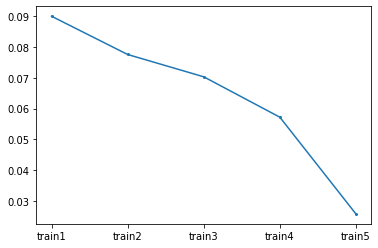

In [ ]:
plt.plot(names,values,marker='o',markersize=2)

In [ ]:
#Here is a continuously decreasing trend for no. of training.

In [ ]:
print(prom_df['age'].max())
print(prom_df['age'].min())

60
20


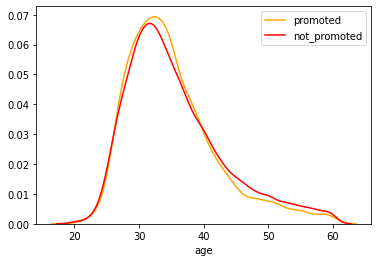

In [ ]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.distplot(sample1['age'],bins=20,hist=False,kde=True,color='orange',vertical=False,label='promoted')
sns.distplot(sample2['age'],bins=20,hist=False,kde=True,color='red',vertical=False,label='not_promoted')

In [ ]:
#Proportion of people promoted is same is almost all ages

In [ ]:
prom_df['previous_year_rating'].value_counts()

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64

In [ ]:
dic={}
for i in range(1,6):
    dic['rating'+str(i)]=len(prom_df[(prom_df['previous_year_rating']==i) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['previous_year_rating']==i)])

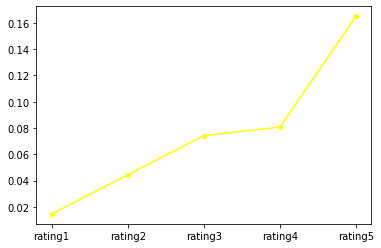

In [ ]:
names=list(dic.keys())
values=list(dic.values())
plt.plot(names,values,marker='o',markersize=4,color='yellow')

In [ ]:
#As the rating increases chances of promotion increases. Chances becomes drastically high for rating of 5.0

In [ ]:
print(prom_df['length_of_service'].max())
print(prom_df['length_of_service'].min())

37
1


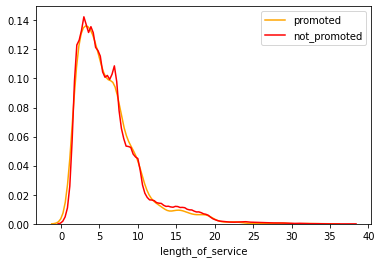

In [ ]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.distplot(sample1['length_of_service'],bins=20,hist=False,kde=True,color='orange',vertical=False,label='promoted')
sns.distplot(sample2['length_of_service'],bins=20,hist=False,kde=True,color='red',vertical=False,label='not_promoted')

In [ ]:
#The proportion for each length of service is almost same
#Most of the employees of company have worked between 3 to 15 years

In [ ]:
prom_df['KPIs_met >80%'].value_counts()

0    31314
1    17346
Name: KPIs_met >80%, dtype: int64

Text(0.5, 1.0, 'KPIs_met >80%')

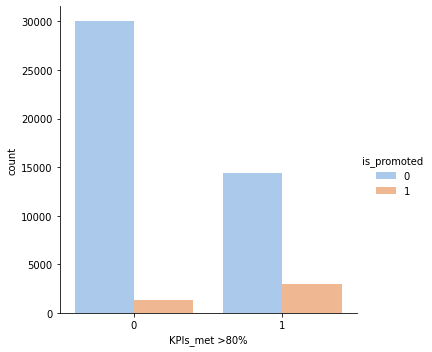

In [ ]:
sns.catplot(x="KPIs_met >80%",kind="count",hue="is_promoted",data=prom_df,palette="pastel")
axis.set_title("KPIs_met >80%")

In [ ]:
#Clearly, those employees for which KPI>80% chances of promotion is more

In [ ]:
prom_df['awards_won?'].value_counts()

0    47534
1     1126
Name: awards_won?, dtype: int64

([<matplotlib.patches.Wedge at 0x7f25268b3da0>,
 [Text(-0.9815242591370925, 0.49659855892398824, 'award_y'),
  Text(0.9815242823845479, -0.4965985129755207, 'award_n')])

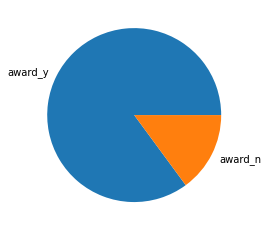

In [ ]:
award_y=len(prom_df[(prom_df['awards_won?']==1) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['awards_won?']==1)])
award_n=len(prom_df[(prom_df['awards_won?']==0) & (prom_df['is_promoted']==1)])/len(prom_df[(prom_df['awards_won?']==0)])
s=award_y+award_n
list1=[award_y/s,award_n/s]
list2=['award_y','award_n']
plt.pie(x=list1,labels=list2)

In [ ]:
#Chances of getting promotion having award won is very high as compared to others

In [ ]:
print(prom_df['avg_training_score'].max())
print(prom_df['avg_training_score'].min())

99
39


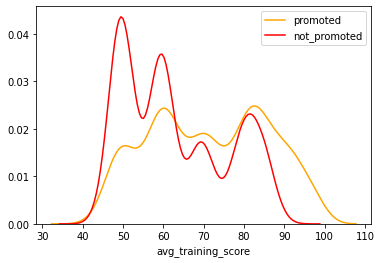

In [ ]:
sample1=prom_df[prom_df['is_promoted']==1]
sample2=prom_df[prom_df['is_promoted']==0]
sns.distplot(sample1['avg_training_score'],bins=30,hist=False,kde=True,color='orange',vertical=False,label='promoted')
sns.distplot(sample2['avg_training_score'],bins=30,hist=False,kde=True,color='red',vertical=False,label='not_promoted')

In [ ]:
#The graph clearly shows that as the training score increases chances of promotion increases

## Model Building

In [ ]:
prom_df.dtypes

other                     uint8
referred                  uint8
sourcing                  uint8
f                         uint8
m                         uint8
Bachelor's                uint8
Below Secondary           uint8
Master's & above          uint8
department               object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
prom_df['department']=le.fit_transform(prom_df['department'])

In [ ]:
#We have seen that age and length_of_service has no serious impact on promotion chances
del prom_df['age']
del prom_df['length_of_service']

In [ ]:
X=prom_df.iloc[:,0:-1].values
y=prom_df.iloc[:,-1].values

In [ ]:
X.shape

(48660, 14)

In [ ]:
y.shape

(48660,)

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(X)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=5,random_state=0,solver='lbfgs')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score_acc=cross_val_score(estimator=LR,X=X,y=y,scoring='accuracy',cv=10)
score_f1=cross_val_score(estimator=LR,X=X,y=y,scoring='f1',cv=10)

In [ ]:
print(score_acc.mean())
print(score_f1.mean())

0.9157418824496506
0.13203524197971167


**Accuracy score in Logistic Regression is .91**

### KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC=KNeighborsClassifier(n_neighbors=5)

In [ ]:
score_acc=cross_val_score(estimator=KNC,X=X,y=y,scoring='accuracy',cv=10,n_jobs=-1)
score_f1=cross_val_score(estimator=KNC,X=X,y=y,scoring='f1',cv=10,n_jobs=-1)

In [ ]:
print(score_acc.mean())
print(score_f1.mean())

0.9249075215782984
0.38707325485555144


**Accuracy score in KNN classifier is .92**

### naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB=GaussianNB()

In [ ]:
score_acc=cross_val_score(estimator=GNB,X=X,y=y,scoring='accuracy',cv=10,n_jobs=-1)
score_f1=cross_val_score(estimator=GNB,X=X,y=y,scoring='f1',cv=10,n_jobs=-1)

In [ ]:
print(score_acc.mean())
print(score_f1.mean())

0.8957254418413483
0.2023354270153018


**Accuracy score in Naive Bayes is .89**

### SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters={'C':[.1,.5,.8,1,3],
            'kernel':['rbf','sigmoid'],
            'gamma':[.1,.5,.05]}

In [ ]:
RCV=RandomizedSearchCV(estimator=svc,param_distributions=parameters,n_iter=5,scoring='accuracy',random_state=0,n_jobs=-1)

In [ ]:
RCV.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.8, 1, 3],
                                        'gamma': [0.1, 0.5, 0.05],
                                        'kernel': ['rbf', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [ ]:
print(RCV.best_params_)
print(RCV.best_score_)

{'kernel': 'rbf', 'gamma': 0.5, 'C': 3}
0.9298397040690507


In [ ]:
svc=SVC(C=5,kernel='rbf',gamma=.5,random_state=0)

In [ ]:
score_acc=cross_val_score(estimator=svc,X=X,y=y,scoring='accuracy',cv=5)
score_f1=cross_val_score(estimator=svc,X=X,y=y,scoring='f1',cv=5)
print(score_acc.mean())
print(score_f1.mean())


0.9309288943690917
0.39282692320047186


**Accuracy score in SVC is .93**

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0)

In [ ]:
parameters={'max_depth':[15,13,14,16,19],
            'max_features':[10,12,11,13]}
RCV=RandomizedSearchCV(estimator=DTC,param_distributions=parameters,n_iter=5,scoring='accuracy',random_state=0)

In [ ]:
RCV.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
          

In [ ]:
print(RCV.best_params_)
print(RCV.best_score_)

{'max_features': 11, 'max_depth': 14}
0.9369913686806411


In [ ]:
DTC=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0,max_features=11,max_depth=14)
score_acc=cross_val_score(estimator=DTC,X=X,y=y,scoring='accuracy',cv=5)
score_f1=cross_val_score(estimator=DTC,X=X,y=y,scoring='f1',cv=5)
print(score_acc.mean())
print(score_f1.mean())


0.9369913686806411
0.4929545117030708


**Accuracy score with decision Tree classifier is .937**

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC=RandomForestClassifier(n_estimators=100,random_state=0,max_features=10,max_depth=10)

In [ ]:
parameters={'max_depth':[15,13,10],
            'max_features':[10,12,9,13],
            'n_estimators':[50,100,150]}
RCV=RandomizedSearchCV(estimator=RFC,param_distributions=parameters,n_iter=5,scoring='accuracy',random_state=0)

In [ ]:
RCV.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features=10,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [ ]:
print(RCV.best_params_)
print(RCV.best_score_)

{'n_estimators': 100, 'max_features': 12, 'max_depth': 13}
0.9399095766543362


In [ ]:
RFC=RandomForestClassifier(n_estimators=100,random_state=0,max_features=12,max_depth=13)
score_acc=cross_val_score(estimator=RFC,X=X,y=y,scoring='accuracy',cv=5)
score_f1=cross_val_score(estimator=RFC,X=X,y=y,scoring='f1',cv=5)
print(score_acc.mean())
print(score_f1.mean())


0.9399095766543362
0.5023577860580979


**Accuracy Score with Random Forest Classifier is .94**

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC=GradientBoostingClassifier(loss='deviance',learning_rate=.1,n_estimators=100,random_state=0)

In [ ]:
parameters={'max_depth':[15,13,10],
            'max_features':[10,12,9,13],
            'n_estimators':[50,100,150],
            'learning_rate':[.1,.05,.08,.3]}
RCV=RandomizedSearchCV(estimator=GBC,param_distributions=parameters,n_iter=5,scoring='accuracy',random_state=0)

In [ ]:
RCV.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [ ]:
print(RCV.best_params_)
print(RCV.best_score_)

{'n_estimators': 100, 'max_features': 10, 'max_depth': 10, 'learning_rate': 0.08}
0.9382655158240855


In [ ]:
GBC=GradientBoostingClassifier(loss='deviance',learning_rate=.08,n_estimators=100,random_state=0,max_features=11,max_depth=10)
score_f1=cross_val_score(GBC,X=X,y=y,scoring='f1',cv=5)
print(score_f1.mean())

0.5065002923336144


In [ ]:
score_acc=cross_val_score(GBC,X=X,y=y,scoring='accuracy',cv=5)
print(score_acc.mean())

0.93832716810522


**Accuracy score with Gradient Boosting Classifier is .938**

**Both Gradient Boosting and Random Forest Classifier gives approx equal performance but Random Forest has slightly better accuracy score**